# Оценка взаимосвязи показателей

- Основные законы распределения вероятностей, проверка гипотез о нормальном законе распределения в среде R, понятие p-value. 
- Понятие корреляционного отношения, линейный коэффицент корреляции Пирсона, проверка его статистической значимости. Построение корреляционных диаграмм. 
- Использование ранговых коэффициентов Спирмена, Кендала. 
- Частные коэффициенты корреляции, множественные коэффициенты коррерляции с использованием R. 

## Основные законы распределения вероятностей, проверка гипотез о нормальном законе распределения в среде R, понятие p-value

R позволяет генерировать набор случайных данных для большого количества функций плотности вероятности. Эти функции имеют следующий вид:

> rfunc (n, p [1], p [2]...)

где func определяет закон вероятности, n - число данных и p[1], p[2]- значения параметров закона. Следующая таблица отображает значения параметров для каждого закона, и возможные значения по умолчанию (если ни одно значение по умолчанию не обозначено, это означает, что параметр должен быть определен пользователем).

|                 **Закон**                 |              **Параметры**             |
|:-----------------------------------------:|:--------------------------------------:|
| Гауссовское распределение                 | rnorm (n, mean=0, sd=1)                |
| Экспоненциальное распределение            | rexp (n, rate=1)                       |
| Гамма распределение                       | rgamma (n, shape, scale=1)             |
| Распределение Пуассона                    | rpois (n, lambda)                      |
| Распределение Вейбула                     | rweibull (n, shape, scale=1)           |
| Распределение Коши                        | rcauchy (n, location=0, scale=1)       |
| Бета распределение                        | rbeta (n, shape1, shape2)              |
| Распределение Стьюдента(t)                | rt(n, df)                              |
| Распределение Фишера(F)                   | rf (n, df1, df2)                       |
| Распределение Пирсона ($Х^2$)             | rchisq (n, df)                         |
| Биноминальное распределение               | rbinom (n, size, prob)                 |
| Геометрическое распределение              | rgeom (n, prob)                        |
| Гипергеометрическое распределение         | rhyper (nn, m, n, k)                   |
| Логистическое распределение               | rlogis (n, location=0, scale=1)        |
| Отрицательное биноминальное распределение | rnbinom (n, размер, prob)              |
| Униформальное распределение               | runif (n, min=0, max=1)                |
| Распределение Вайлкоксона                 | rsignrank (nn, n) |

Большую роль в различных статистических методах имеет нормальный закон распределения. Часто предполагается, что для корректного использования некоторого метода используемые показатели должны иметь нормальное распределение. Поэтому естественным образом возникают вопросы проверки гипотез о нормальном распределении. Все эти функции можно использовать, заменяя символ r на d, p или q, тогда вычисляем плотность вероятности dfunc(x),кумулятивная плотность вероятности pfunc (x), и значения квантилей qfunc(p), 0 <p <1)

В среде R для проверки гипотез можно использовать наглядное представление в виде диаграммы квантиль-квантиль, суть которой состоит в том, что по одной оси откладывают квантили нормального распределения, а по другой квантили распределения по исходным данным. В идеальном случае все точки должны располагаться на прямой линии. Отклонения от прямолинейности позволяют наглядно судить о соответствии - несоответствии нормальному распределению.
Для построения диаграммы квантиль-квантиль в среде R  можно использовать функцию **qqnorm**.

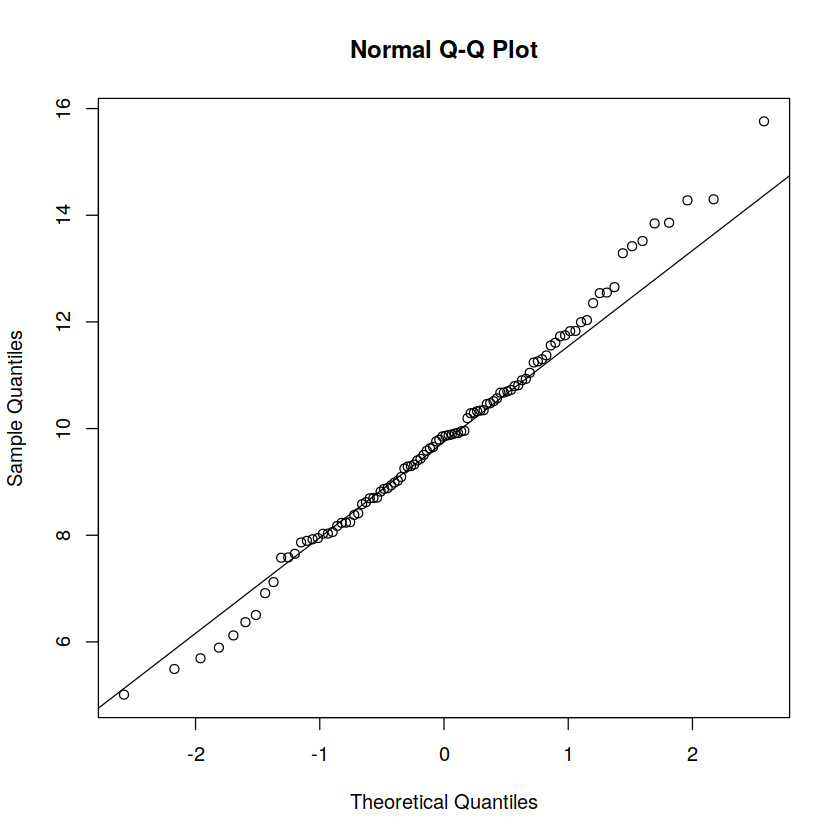

In [33]:
#Пример построения диаграммы квантиль-квантиль для нормального закона распределения
A<-rnorm(100,10,2)

qqnorm(A)
qqline(A)

Как видно из диаграммы, существенных отклонений нет.

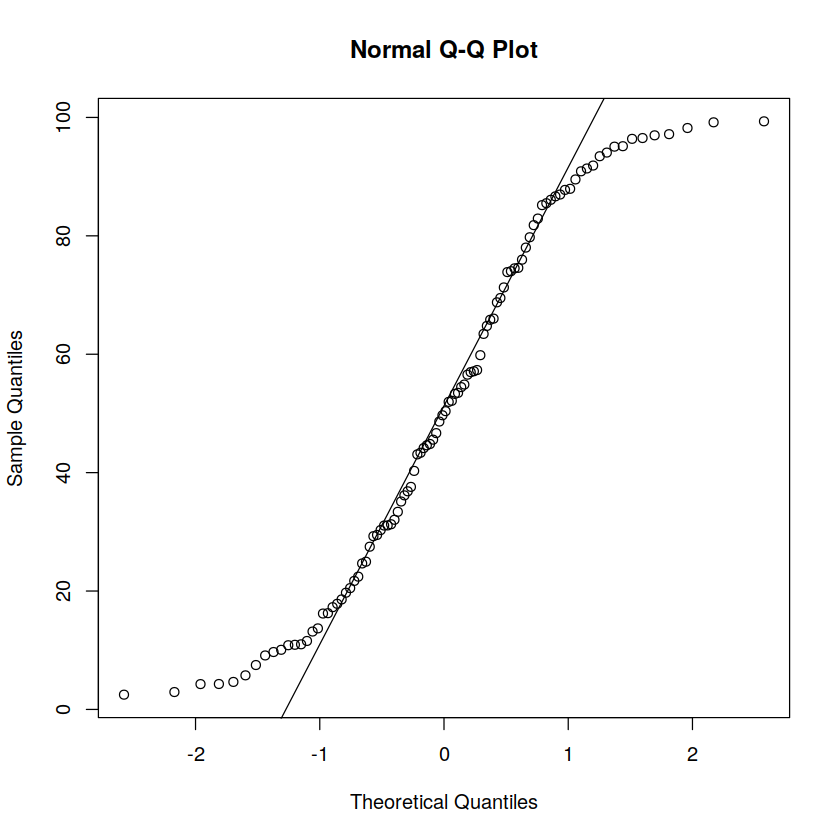

In [34]:
B<-runif(100,2,100)
qqnorm(B)
qqline(B)

А здесь имеем существенные отклонения в хвостах. Судить о распределении также помогают рассмотренные ранее аппроксимации закона распределения.

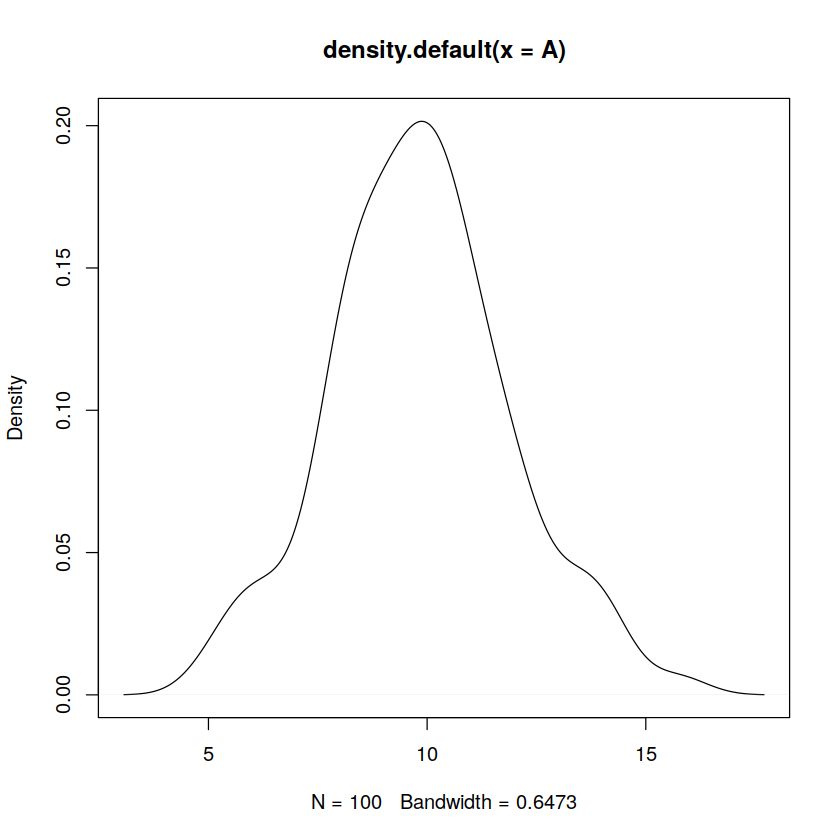

In [35]:
plot(density(A))

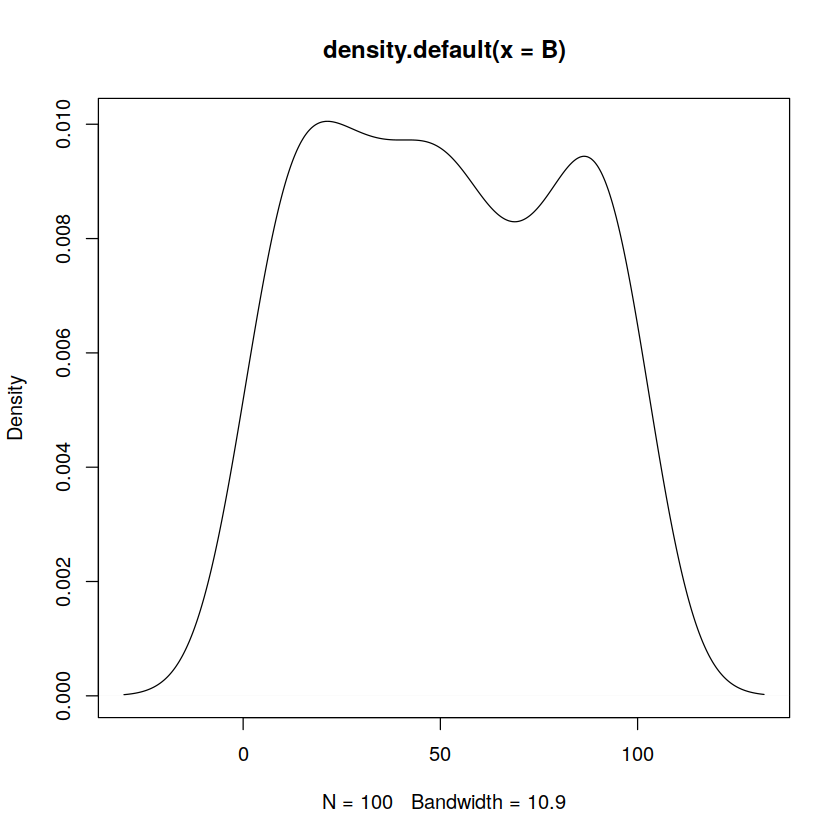

In [36]:
plot(density(B))

Кроме построения диаграммы квантиль - квантиль для нормального закона распределения, можно строить такие диаграммы для других законов.

In [37]:
#Диаграмма квантиль-квантиль для равномерного (унимодального) закона распределения
#install.packages('gap')
library(gap)

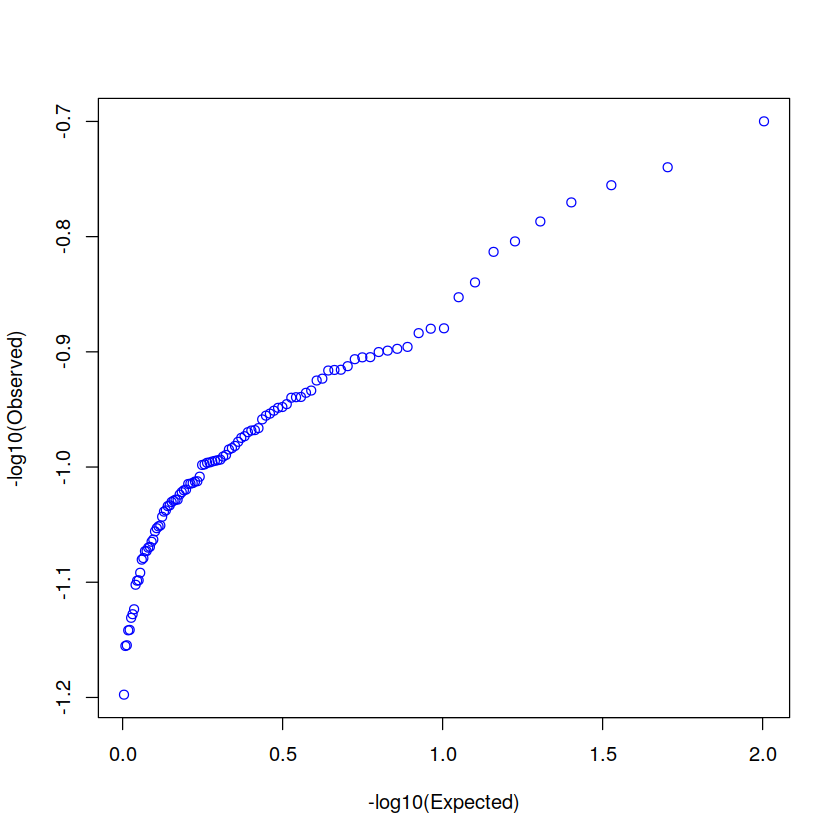

In [38]:
qqunif(A)
qqline(A)

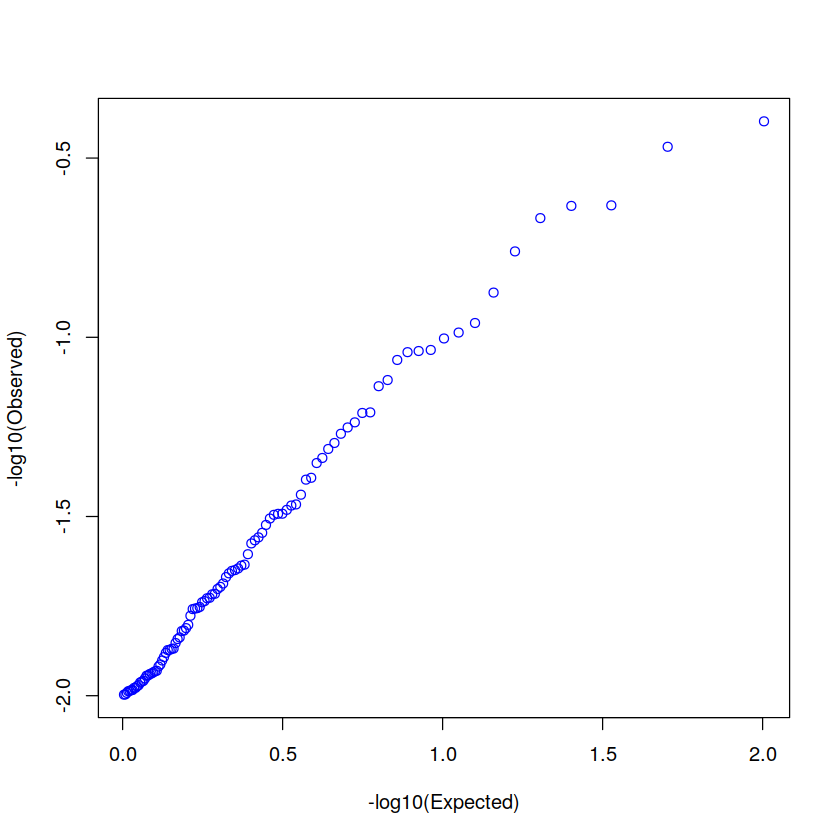

In [39]:
qqunif(B)

Однако более информативным является непосредственная проверка гипотезы о распределении.  Вот как выглядит использование этой функции для нормального закона распределения с использованием теста Шапиро-Уилка: 

In [40]:
shapiro.test(A)


	Shapiro-Wilk normality test

data:  A
W = 0.99097, p-value = 0.7428


In [41]:
shapiro.test(B)


	Shapiro-Wilk normality test

data:  B
W = 0.93657, p-value = 0.0001198


Для суждения нужно смотреть на полученное значение p-value.

**p-value** - это вероятность получить такое же вероятностное распределение
при условии, что нулевая гипотеза верна. Чем меньше полученное p (на практике меньше 0.05 или 0.1), тем больше уверенность отвергнуть нулевую гипотезу.

В тесте Шапиро-Уилка под нулевой гипотезой понимают гипотезу, что экспериментальные данные подчиняются нормальному закону распределения.


|            | Принять H0                                               | Отвергнуть H0                                             |
|------------|----------------------------------------------------------|-----------------------------------------------------------|
| H0 верна   | Верное решение с вероятностью $1-\alpha$                 | Ошибочное решение с вероятностью $\alpha$ (ошибка 1 рода) |
| H0 неверна | Ошибочное решение с вероятностью $\beta$ (ошибка 2 рода) | Верное решение с вероятностью $1-\beta$                   |



Мы можем принять верную гипотезу Н0 или отвергнуть не верную гипотезу Н0 на основе критерия. В этом случае мы не совершаем никакой ошибки. А еще мы можем отвергнуть верную нулевую гипотезу – это называется ошибкой первого рода. Для оценки возможности совершения такой ошибки используют вероятность, обозначаемую $\alpha$ и называемую уровнем значимости критерия. Также возможна и ошибка второго рода $\beta$ – когда мы принимаем неверную нулевую гипотезу. На практике может использоваться величина  $1-\beta$ или мощность критерия – вероятность не совершить ошибку второго рода или принять неверную гипотезу.

p-value упрощает трактовку введенных понятий.  Фактически p-value - это вероятность ошибки при отклонении нулевой гипотезы (ошибки первого рода). Например, если вычисленное по выборке значение проверочной статистики соответствует p = 0.05, это указывает на вероятность справедливости гипотезы 0,5%.

## Понятие корреляционного отношения, линейный коэффицент корреляции Пирсона, проверка его статистической значимости. Построение корреляционных диаграмм.

При анализе данных очень часто приходится оценивать насколько значение одного показателя зависит от значения другого.

В статистике для этих целей разработано много различных подходов. Прежде, чем мы начнем их рассматривать, важно указать, что в статистическом анализе изучаются не все виды зависимостей.

Например, **функциональные зависимости** между переменными изучают в математическом анализе, в классической физике. Если переменная $y$ функционально зависит от переменной $x$, то это означает, что если сейчас при $x=1$ $y=6$, то это будет и завтра, и вообще всегда. 
Статистическая взаимосвязь между переменными напротив не проявляется в каждом отдельном случае, иногда могут быть существенные отклонения, иногда не очень существенные. Про такую взаимосвязь можно говорить, что на большом числе данных в среднем будет наблюдаться  взаимосвязь. Например, известно, что в среднем при увеличении объема производства товара его себестоимость снижается. 

Возникает вопрос, как оценить такую взаимосвязь. И здесь на помощь приходит идея группировки. Пусть мы оценивает взаимосвязь двух количественных показателей $X$, $Y$. 
Для показателей $X$, $Y$ можно оценить их вариабельность (изменчивость).

Если мы разобъем все множество отсортированных значений показателя $X$ на группы, то вариабельность внутри каждой группы значений показателя $X$ будет очевидно меньше вариабельности на всем множестве $X$. Однако при таком разбиении соответствующие значения показателя $Y$ тоже разобьются на группы. 

Что можно сказать про вариабельность внутри полученных групп значений показателя $Y$?

Ясно одно, что если между показателями $X$ и $Y$ есть какая-либо взаимосвязь, то вариабельность внутри полученных групп значений показателя $Y$ также должна снизиться. Это обстоятельство и положено в основу так называемого **корреляционного отношения**.

Для рассуждения на конкретных примерах используем, используя библиотеку датасетов datasets

In [ ]:
install.packages("datasets")
library(datasets)
Data<-

In [19]:
Data<-read.csv("Computers.csv",header=TRUE)
View(Data)

X,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>
1,1499,25,80,4,14,no,no,yes,94,1
2,1795,33,85,2,14,no,no,yes,94,1
3,1595,25,170,4,15,no,no,yes,94,1
4,1849,25,170,8,14,no,no,no,94,1
5,3295,33,340,16,14,no,no,yes,94,1
6,3695,66,340,16,14,no,no,yes,94,1
7,1720,25,170,4,14,yes,no,yes,94,1
8,1995,50,85,2,14,no,no,yes,94,1
9,2225,50,210,8,14,no,no,yes,94,1


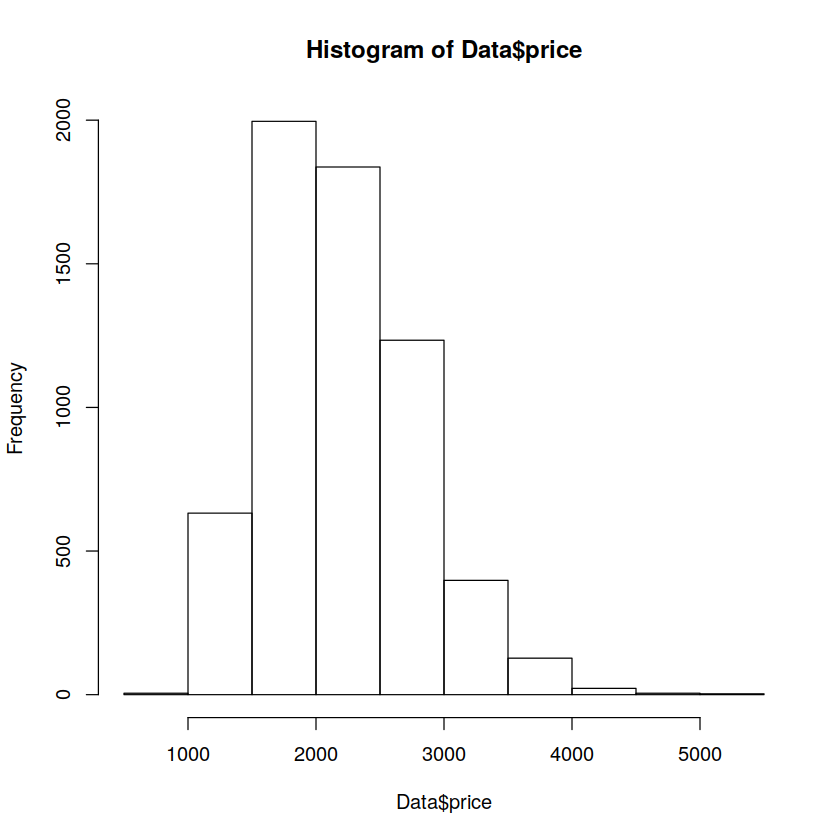

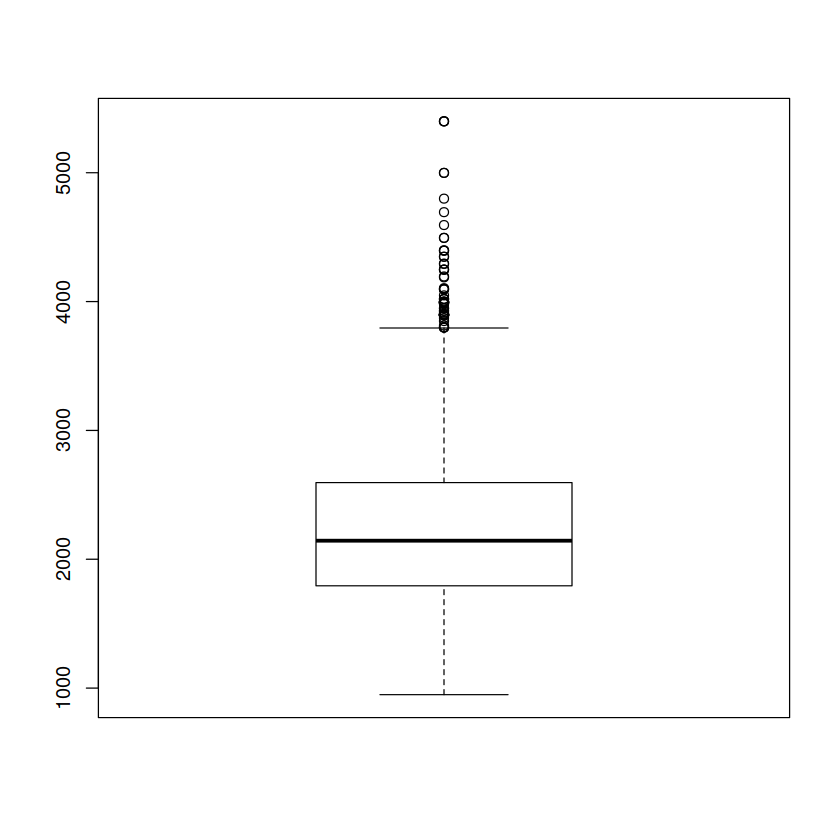

In [24]:
#Построим гистограмму и ящик с усами по цене

g<-hist(Data$price)

boxplot(Data$price)

Ящик с усами показывает на существенные отклонения от центральной тенденции в правом хвосте. Соответственно по коэффициенту вариации статистическая совокупность близка к неоднородной.

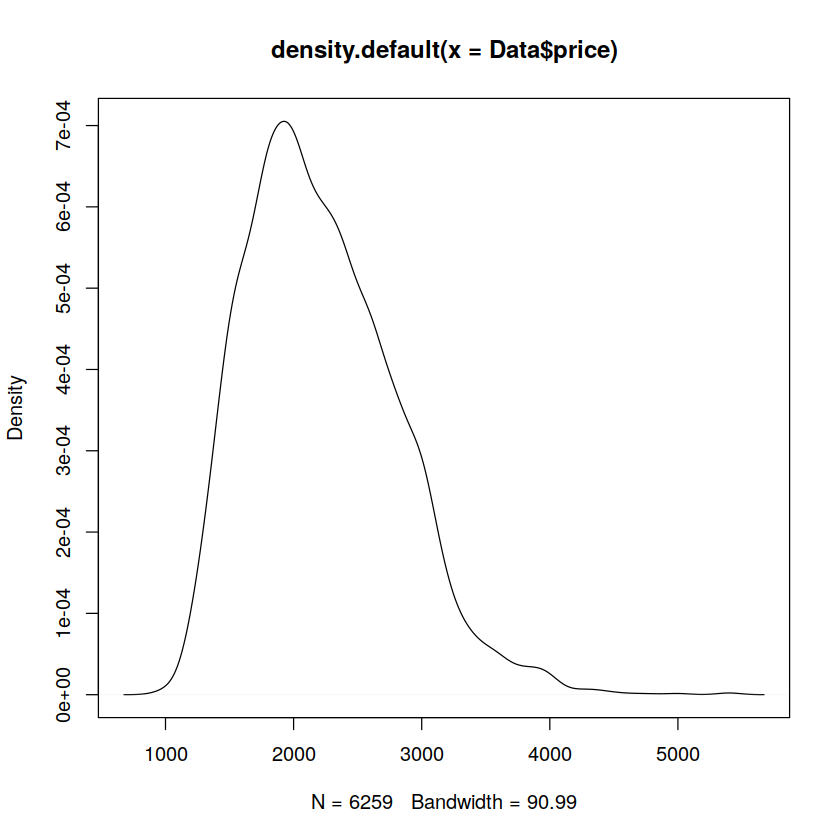

In [21]:
plot(density(Data$price))

In [22]:
kv=100*sd(Data$price)/mean(Data$price)
kv

[1] 26.16733

Посмотрим на группировку по цене.

In [28]:
g

$breaks
 [1]  500 1000 1500 2000 2500 3000 3500 4000 4500 5000 5500

$counts
 [1]    5  632 1996 1837 1234  398  127   22    5    3

$density
 [1] 1.597699e-06 2.019492e-04 6.378016e-04 5.869947e-04 3.943122e-04
 [6] 1.271769e-04 4.058156e-05 7.029877e-06 1.597699e-06 9.586196e-07

$mids
 [1]  750 1250 1750 2250 2750 3250 3750 4250 4750 5250

$xname
[1] "Data$price"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

Введем в рассмотрение понятия **внутригрупповая дисперсия и средняя внутригрупповая дисперсия**.

$$\sigma_j^2=\frac{\sum_{i=1}^{n_j}(x_i-\overline{x}_j)^2}{n_j}$$
где $\sigma_j$ - внутригрупповая дисперсия $j$-й группы;
$n_j$ - количество элементов $j$-й группы;
$\overline{x}_j$ - среднее значение внутри группы;
$x_i$ - $i$-е значение внутри группы.

Понятие средняя внутригрупповая дисперсия вводится как средневзвешенная внутригрупповая дисперсия:
$$\overline{\sigma}^2=\frac{\sum_{j=1}^K \sigma_j^2\cdot n_j}{n}=\frac{\sum_{j=1}^K\sum_{i=1}^{n_j}(x_i-\overline{x}_j)^2}{\sum_{j=1}^K n_j}$$
где $K$ - количество групп, $\sum_{j=1}^K n_j=n$.

Значения показателей дисперсии внутри группы различаются, поэтому можно ввести понятие **межгрупповая дисперсия**, которая характеризует вариацию, обусловленную влиянием
фактора, положенного в основу группировки:
$$\delta^2=\frac{\sum_{j=1}^{K}(\overline{x}_j-\overline{x})^2\cdot n_j}{\sum_{j=1}^K n_j}$$
где $\overline{x}$ - общая средняя, $\overline{x}_j$ - среднее арифметическое $j$-й группы.


Всего по цене получилось 11 групп. Оценим взаимосвязь между ценой и объемом оперативной памяти ram.

In [45]:
DD<-data.frame(stringsAsFactors = FALSE)
for (i in c(1:10)){
    p<-Data$ram[(Data$price>=g$breaks[i]) & (Data$price<g$breaks[i+1])]
    #print(p)
    DD<-rbind(DD,c(mean(p),(sd(p))^2, length(p), sd(p)/mean(p)*100))         
}
colnames(DD)<-c("sr","sd_2","count", "kv")
View(DD)
            
                

sr,sd_2,count,kv
<dbl>,<dbl>,<dbl>,<dbl>
2.000000,0.000000,5,0.00000
3.987322,1.815712,631,33.79420
5.158738,4.947234,1997,43.11593
8.047904,16.938880,1837,51.13986
13.034036,38.858532,1234,47.82603
15.798995,47.193752,398,43.48233
11.433071,32.183977,127,49.62002
12.363636,16.623377,22,32.97717
12.800000,19.200000,5,34.23266


Рассчитаем среднюю внутригрупповую дисперсию:

In [49]:
Dvg<-sum(DD$sd_2*DD$count)/sum(DD$count)
Dvg

[1] 18.12201

Рассчитаем межгрупповую дисперсию:

In [51]:
Dmg<-sum((DD$sr-mean(Data$ram))^2*DD$count)/sum(DD$count)
Dmg

[1] 13.6106

Рассчитаем общую дисперсию:

In [53]:
D<-sd(Data$ram)^2
D

[1] 31.70928

In [54]:
Dvg+Dmg

[1] 31.73261

Оказывается справедливым следующее соотношение: общая дисперсия признака равна сумме межгрупповой и срердней межгрупповой дисперсиям:
 $$D=\overline{\sigma}^2+\delta^2$$

Из наших расчетов видно, что большую долю изменчивости всех данных вносит именно межгрупповая дисперсия. 
Поскольку в основу группировки был положен сам признак $x$, то это указывает, что группировка по этому признаку позволяет объяснить большую часть изменчивости всех данных. 

Это обстоятельство может быть  положено в основу оценки насколько группировка по одному признаку способна объяснить изменчивость данных по другому признаку.

Для этих целей вводится понятие **эмпирическое корреляционное отношение**:

$$1=\frac{\overline{\sigma}^2}{D}+\frac{\delta^2}{D}\Rightarrow \eta=\sqrt{\frac{\delta^2}{D}}=\sqrt{1-\frac{\overline{\sigma}^2}{D}}$$

Корреляционное отношение изменяется в изтервале $0\leq \eta\leq 1$. Чем ближе к 1 будет его
величина, тем сильнее взаимосвязь между группируемым признаком и признаком по которому проводилась группировка.

Ниже приведен расчет корреляционного отношения для нашего случая:

In [55]:
sqrt(1-Dmg/D)

[1] 0.7554927

**Задание** Оценить зависимость между ценой и  скоростью процессора speed.

### Линейный коэффициент корреляции

И все же коэффициенты измеренния линейной статистической связи между различными факторами используются существенно чаще. Это связано с тем, что полученные статистические связи поддаются лучшей интерпретации и имеют большую практическую пользу при принятии различных управленческих решений.

Наибольшее распространение получили следующие меры измерения линейной статистической связи:

- **Коэффициент линейной корреляции Пирсона** характеризует тесноту и направление связи между двумя коррелируемыми признаками в случае наличия между ними линейной связи:
$$r_{\text{п}}=\frac{\frac{\sum_{i=1}^n(x_i-\overline{x})\cdot (y_i-\overline{y})}{n}}{\sigma_x\cdot\sigma_y}=\frac{\frac{\sum_{i=1}^n(x_iy_i-x_i\overline{y}-\overline{x}y_i+\overline{x}\overline{y})}{n}}{\sigma_x\cdot\sigma_y}=\frac{\frac{\sum x_iy_i}{n}+\overline{x}\cdot\overline{y}-\overline{y}\frac{\sum x_i}{n}-\overline{x}\frac{\sum y_i}{n}}{\sigma_x\cdot\sigma_y}=\frac{\overline{x\cdot y}+\overline{x}\cdot\overline{y}-2\overline{x}\cdot\overline{y}}{\sigma_x\cdot\sigma_y}$$
$$r_{\text{п}}=\frac{\overline{x\cdot y}-\overline{x}\cdot\overline{y}}{\sigma_x\cdot\sigma_y}$$

Коэффициент линейной корреляции меняется в диапазоне от-1 до 1.
Заметим, что линейные преобразования переменных не влияют на коэффициент корреляции - если все значения переменных увеличить или уменьшить на одну и ту же величину, ко величина коэффициента корреляции от этого не изменится.

Коэффициент корреляции не имеет размерности и, следовательно, его можно сопоставлять для разных выборок.

Проведем расчеты коэффициента корреляции Пирсона для двух статистически связанных переменных:

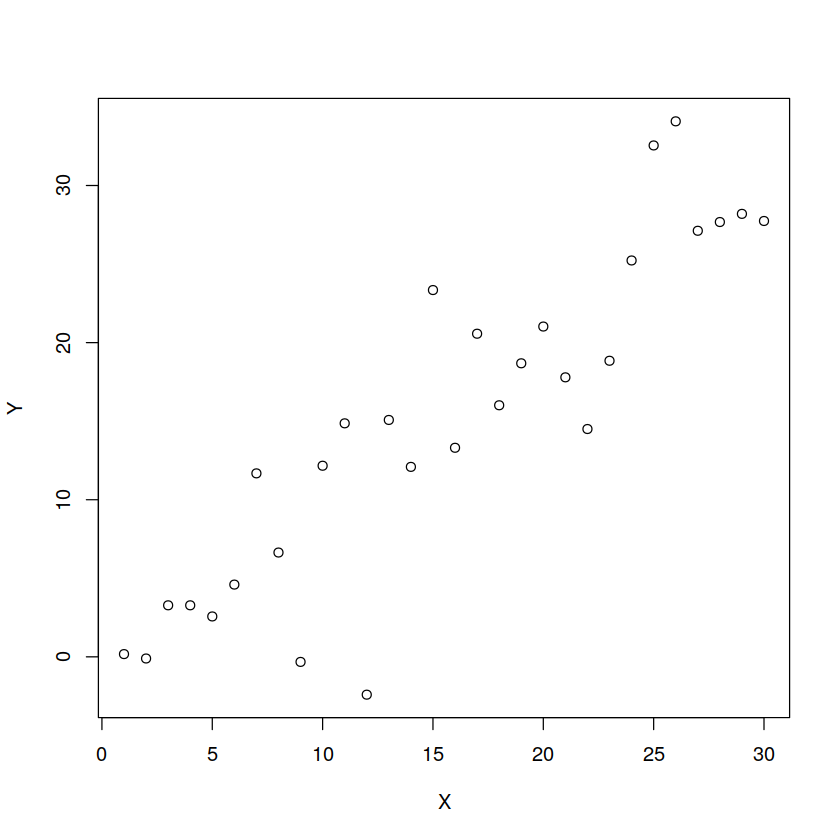

In [4]:
X=c(1:30)
Y=x+rnorm(30,0,5)
plot(X,Y)

Выполним расчет коэффициента линейной корреляции Пирсона:

In [5]:
sigmaX<-sqrt(sum((X-mean(X))^2)/length(X))
sigmaY<-sqrt(sum((Y-mean(Y))^2)/length(Y))
r<-(mean(X*Y)-mean(X)*mean(Y))/(sigmaX*sigmaY)
r

[1] 0.8934025

Полученный коэффициент корреляции говорит о наличии прямой статистической связи между переменными x, y.

В R для расчета коэффициента корреляции есть встроенные средства:

In [6]:
cor(X,Y)

[1] 0.8934025

In [7]:
help(cor)

cor {stats},R Documentation
x,"a numeric vector, matrix or data frame."
y,"NULL (default) or a vector, matrix or data frame with compatible dimensions to x. The default is equivalent to y = x (but more efficient)."
na.rm,logical. Should missing values be removed?
use,"an optional character string giving a method for computing covariances in the presence of missing values. This must be (an abbreviation of) one of the strings ""everything"", ""all.obs"", ""complete.obs"", ""na.or.complete"", or ""pairwise.complete.obs""."
method,"a character string indicating which correlation coefficient (or covariance) is to be computed. One of ""pearson"" (default), ""kendall"", or ""spearman"": can be abbreviated."
V,"symmetric numeric matrix, usually positive definite such as a covariance matrix."


Переменные можно также завернуть в датафрейм и применить расчет корреляции к нему:

In [12]:
cor(data.frame(X,Y))

,X,Y
X,1.0000000,0.8934025
Y,0.8934025,1.0000000


В результате строится так называемая корреляционная матрица. Теснота корреляционной взаимосвязи между переменными x, y может быть качественно охарактеризована с помощью рекомендаций таблицы:

| Значение коэффициента корреляции | Теснота линейной связи                  |
|----------------------------------|-----------------------------------------|
| $0.8\leq \vert r_\text{п}\vert\leq 1$    | Сильная связь, близкая к функциональной |
| $0.5\leq \vert r_\text{п}\vert< 0.8$     | Связь средней силы                      |
| $0.3\leq |r_\text{п}|< 0.5 $    | Умеренная связь                         |
| $0.2\leq |r_\text{п}|< 0.3 $    | Слабая связь                            |
| $0\leq |r_\text{п}|<0.2  $      | Очень слабая связь                      |

Коэффициент корреляции очень чувствителен к выбросам. Даже отдельное аномальное наблюдение может существенно исказить значение коэффициента линейной корреляции Пирсона и привести к неправильным выводам.

На практике вместо использования представленной таблицы более тонкий анализ предполагает **проверку статистической значимости коэффициента корреляции**. 

Для проверки статистической значимости выдвигаются следующие гипотезы:

$H_0$ - отсутствие статистической взаимосвязи между признаками (полученные значения корреляции вызваны случайными факторами).

$H_1$ - конкурирующая гипотеза свидетельствует о наличии линейной взаимосвязи между признаками.

Для проверки гипотезы $H_0$ требуется исходя из выборочных данных подобрать статистику-критерий.
На практике используется статистика:

$$T=\frac{|r_{\text{п}}|}{\sqrt{1-r_{\text{п}}^2}}\cdot \sqrt{n-2}$$
n - число измерений.

При справедливости нулевой гипотезы статистика $T$ имеет распределение Стьюдента (t-распределение).

Таким образом, для проверки справедливости $H_0$ гипотезы по наблюдаемым данным рассчитывается статистика $T_{\text{набл}}$, затем по таблице распределения Стьюдента находится критическое значение статистики $T_\text{кр}$ для заданного уровня значимости $\alpha$ и степеней свободы $n-2$.

Если $T_{\text{набл}}>T_\text{кр}$, то нулевая гипотеза отвергается с вероятностью ошибки $\alpha$ и корреляция между переменными признается значимой, в противном случае нет.

Множество всех возможных значений критерия разбивается на два множества: 1. значения критерия, при которых нулевая гипотеза отвергается, 2. при которых нулевая гипотеза принимается.

*Критическая область* - совокупность значений критерия, при которых нулевая гипотеза отвергается. Различают правостороннюю, левостороннюю, двухсторонюю критические области. 

**Правосторонняя критическая область** определяется из условия $P(T>T_{\text{кр}})=\alpha, T_{\text{кр}}>0$, т.е. критическое значение - это значение критерия, для которого при справедливости нулевой гипотезы неравенство $T>T_{\text{кр}}$ выполняется с вероятностью $\alpha$. Таким образом, если наблюдаемое значениие статистики оказывается больше критического, то при справедливости нулевой гипотезы это может произойти с вероятностью $\alpha$. Задавшись малым значением $\alpha=0.05$, можно отвергнуть нулевую гипотезу с вероятностью ошибиться 0.05.


**Левосторонняя критическая область** определяется из условия $P(T<T_{\text{кр}})=\alpha, T_{\text{кр}}<0$, т.е. критическое значение - это значение критерия, для которого при справедливости нулевой гипотезы неравенство $T<T_{\text{кр}}$ выполняется с вероятностью $\alpha$.

**Двухсторонняя критическая область**  определяется из условия $P(T<T1)+P(T>T_2)=\alpha$ -  при справедливсти нулевой гипотезы сумма вероятностей, что критерий примет значение меньше $T1$ или больше $T_2$ равна $\alpha$. Если распределение критерия симметрично относительно нуля, то берут $-T_1=T_2$ и вводят условие $P(T>T_{\text{кр}})=\frac{\alpha}{2}$


Для нахождения критической статистики в R можно использовать:

qt(p, df, lower.tail=TRUE)

где:

p: уровень значимости

df: число степеней свободы

lower.tail: если TRUE, возвращается критическое значение для левосторонней критической области. Значение по умолчанию TRUE.

Выполним расчет  критической статистики для двухсторонней критической области в R:

In [16]:
qt(0.05/2, length(X)-2, lower.tail=FALSE)

[1] 2.048407

In [17]:
Tnab<-abs(cor(X,Y))/sqrt(1-cor(X,Y)^2)*sqrt(length(X)-2)
Tnab

[1] 10.5228

Таким образом, у нас получилось $Т_{\text{набл}}>T_{\text{кр}}$ - нулевая гипотеза отвергается с вероятностью ошибиться не более 0.05 (ошибка 1 рода).

На самом деле в R есть встроенные средства для проверки гипотез статистической значимости коэффициентов корреляции.

In [13]:
cor.test(X,Y)


	Pearson's product-moment correlation

data:  X and Y
t = 10.523, df = 28, p-value = 3.088e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7861763 0.9484110
sample estimates:
      cor 
0.8934025 


Как видно, проведен расчет наблюдаемой статистики, а также получено p-value.
Чем меньше полученное p (на практике меньше 0.05 или 0.1), тем больше уверенность отвергнуть нулевую гипотезу. Исходя из полученных результатов мы отвергаем нулевую гипотезу с очень маленькой вероятностью ошибиться.

In [56]:
help(cor.test)

cor.test {stats},R Documentation
"x, y",numeric vectors of data values. x and y must have the same length.
alternative,"indicates the alternative hypothesis and must be one of ""two.sided"", ""greater"" or ""less"". You can specify just the initial letter. ""greater"" corresponds to positive association, ""less"" to negative association."
method,"a character string indicating which correlation coefficient is to be used for the test. One of ""pearson"", ""kendall"", or ""spearman"", can be abbreviated."
exact,a logical indicating whether an exact p-value should be computed. Used for Kendall's tau and Spearman's rho. See ‘Details’ for the meaning of NULL (the default).
conf.level,confidence level for the returned confidence interval. Currently only used for the Pearson product moment correlation coefficient if there are at least 4 complete pairs of observations.
continuity,"logical: if true, a continuity correction is used for Kendall's tau and Spearman's rho when not computed exactly."
formula,"a formula of the form ~ u + v, where each of u and v are numeric variables giving the data values for one sample. The samples must be of the same length."
data,an optional matrix or data frame (or similar: see model.frame) containing the variables in the formula formula. By default the variables are taken from environment(formula).
subset,an optional vector specifying a subset of observations to be used.
na.action,"a function which indicates what should happen when the data contain NAs. Defaults to getOption(""na.action"")."


В практике корреляционного анализа часто прибегают к различным наглядным способам представления корреляционных взаимосвязей. Популярным способом является визуализация корреляционной матрицы.

Для демонстрации возьмем популярный датасет - зависимость длины и ширины чашелистника и лепестка для различных видов ириса.

In [57]:
iris<-read.csv("iris.csv")
View(iris)

X,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


<img src="ris1.jpg">

Выполним выборку данных:

In [58]:
F<-data.frame(iris$Sepal.Length, iris$Sepal.Width, iris$Petal.Length, iris$Petal.Width)
colnames(F)<-c("sl","sw","pl","pw")

Для анализа корреляционных связей получим корреляционную матрицу и построим корреляционную карту:

In [59]:
C<-cor(F)
View(C)

,sl,sw,pl,pw
sl,1.0000000,-0.1175698,0.8717538,0.8179411
sw,-0.1175698,1.0000000,-0.4284401,-0.3661259
pl,0.8717538,-0.4284401,1.0000000,0.9628654
pw,0.8179411,-0.3661259,0.9628654,1.0000000


Для наглядной визуализации корреляционных связей, использую специальные диаграммы.

In [ ]:
install.packages("corrplot")

In [60]:
library(corrplot)

corrplot 0.92 loaded



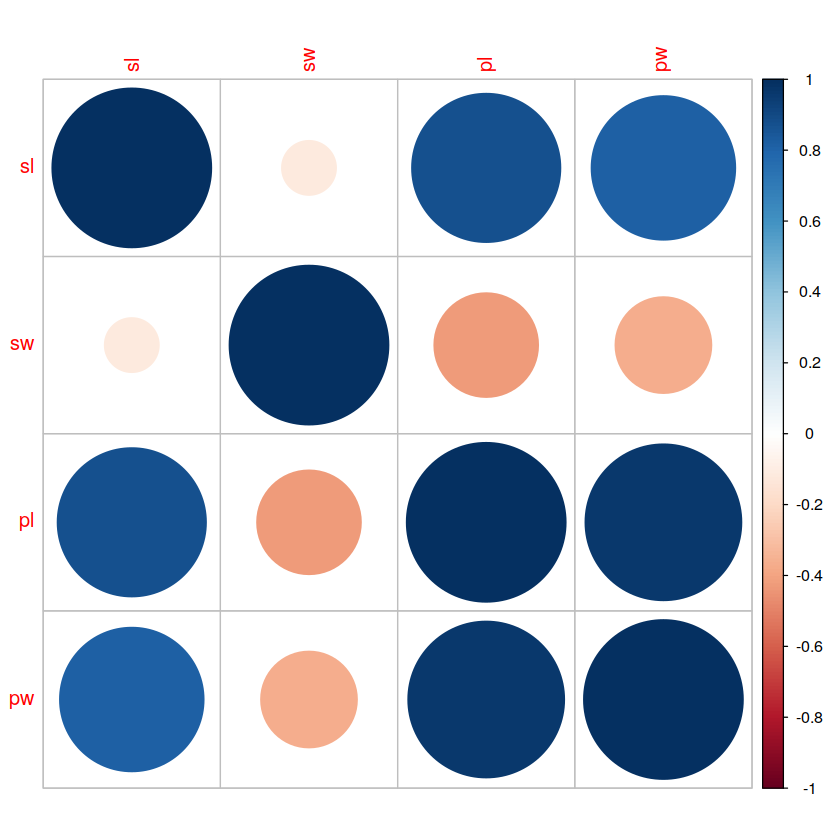

In [63]:
corrplot(C, method = "circle", number.cex=1, tl.cex =1)

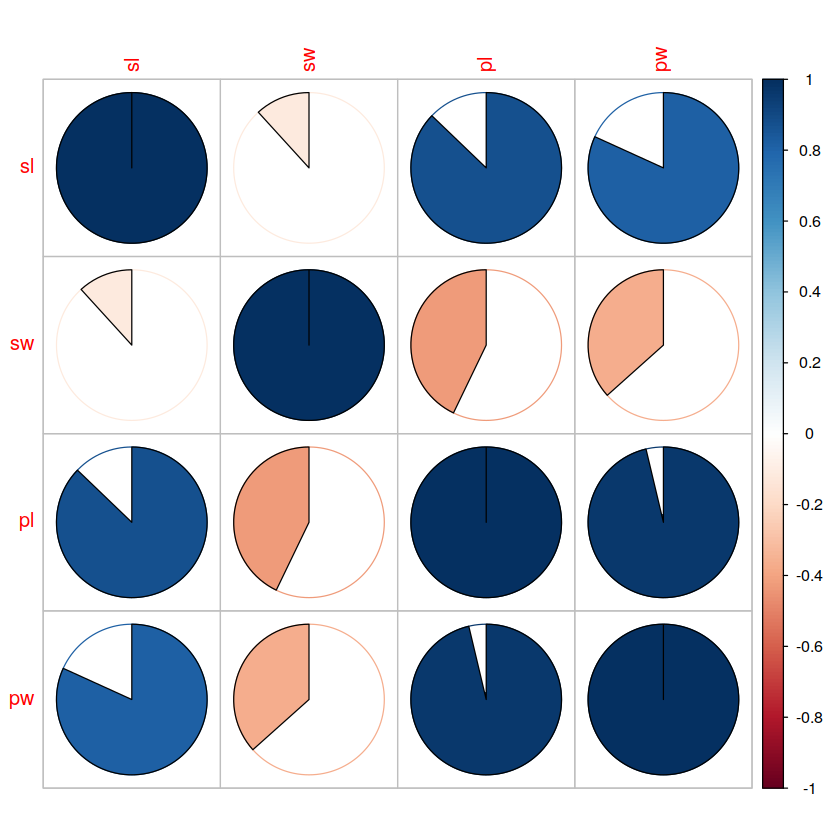

In [64]:
corrplot(C, method="pie")

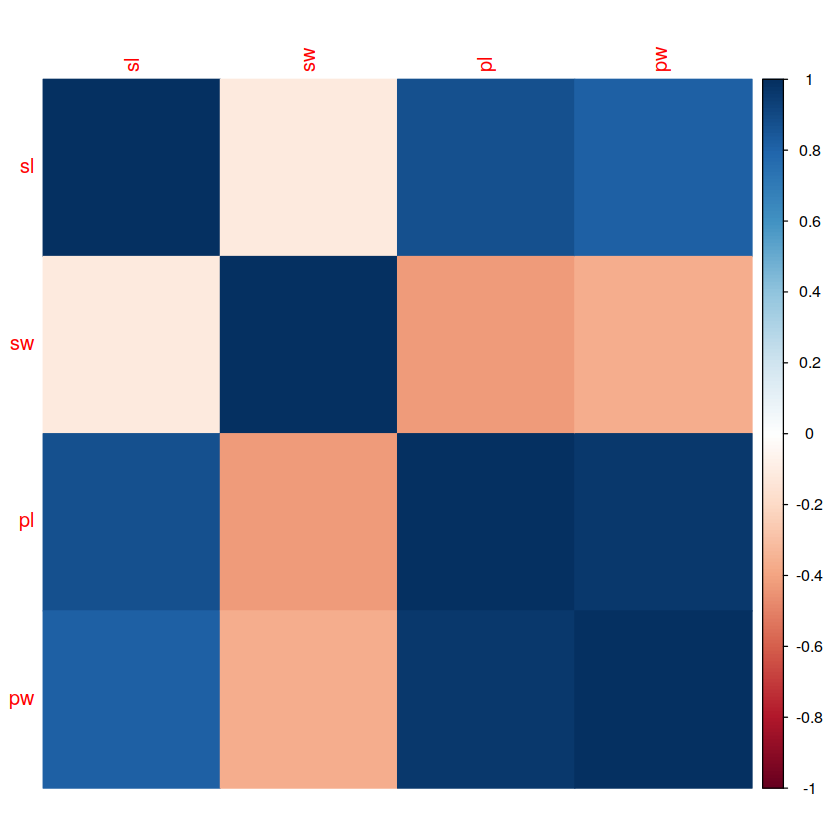

In [65]:
corrplot(C, method="color")

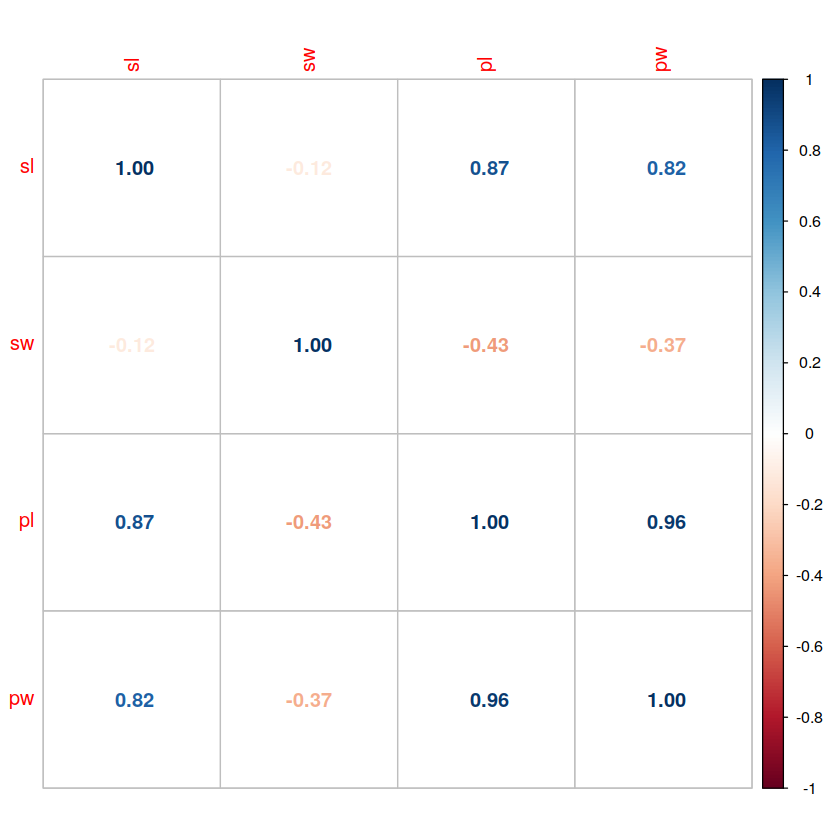

In [66]:
corrplot(C, method="number")

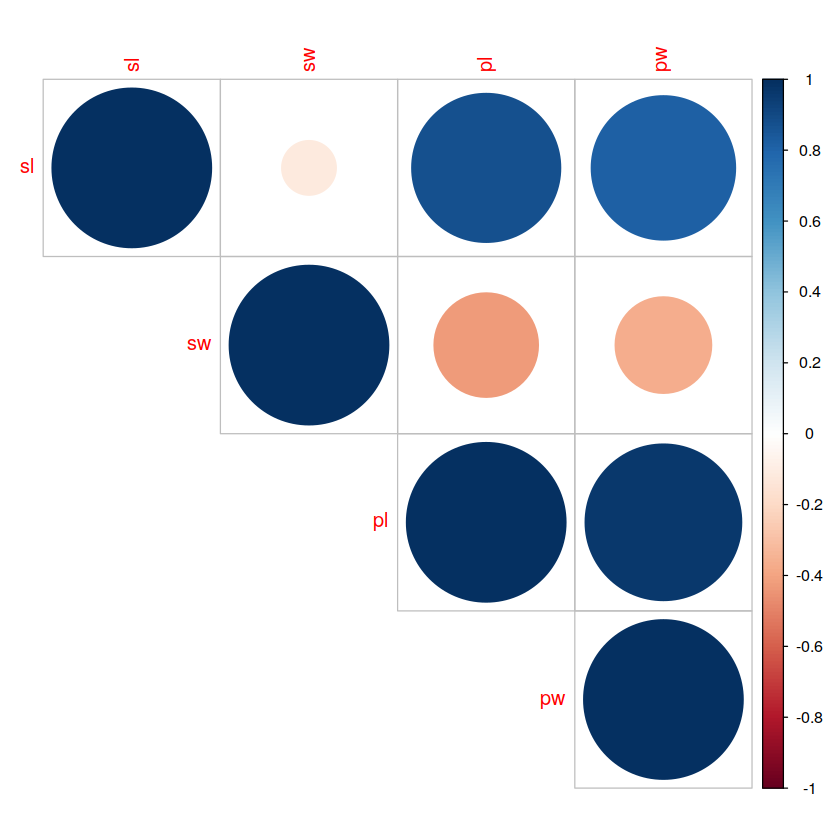

In [67]:
corrplot(C, type="upper")

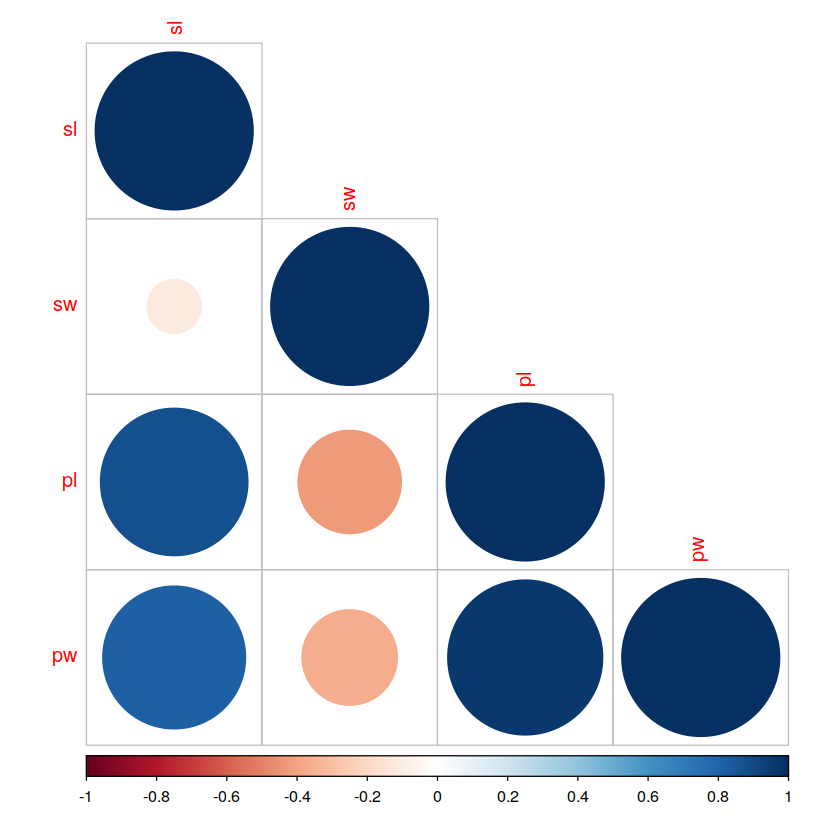

In [68]:
corrplot(C, type="lower")

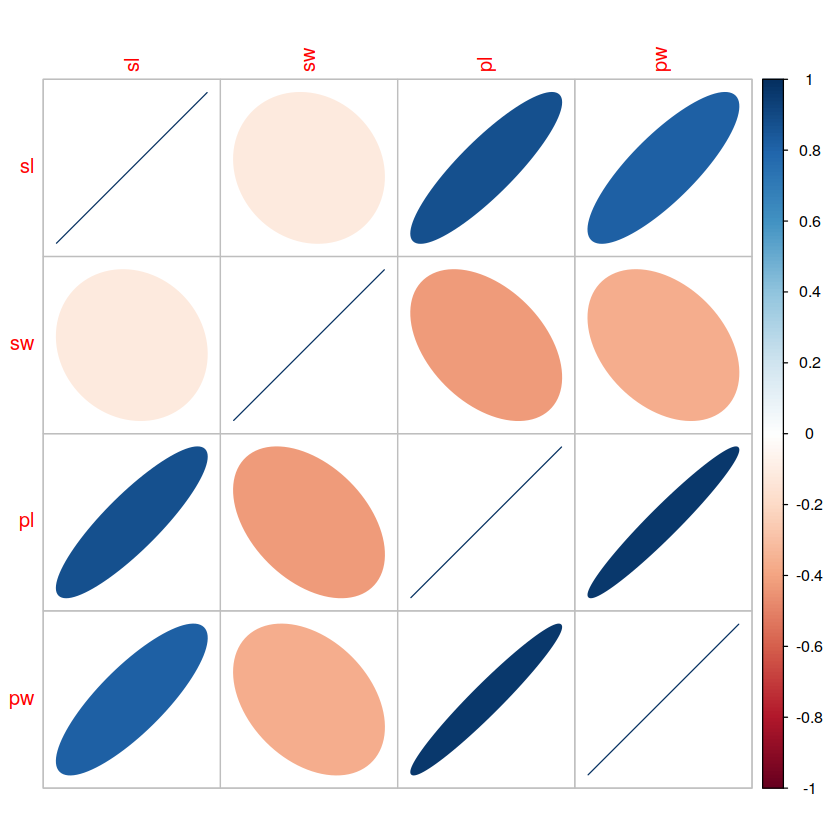

In [69]:
corrplot(C, method = "ellipse")

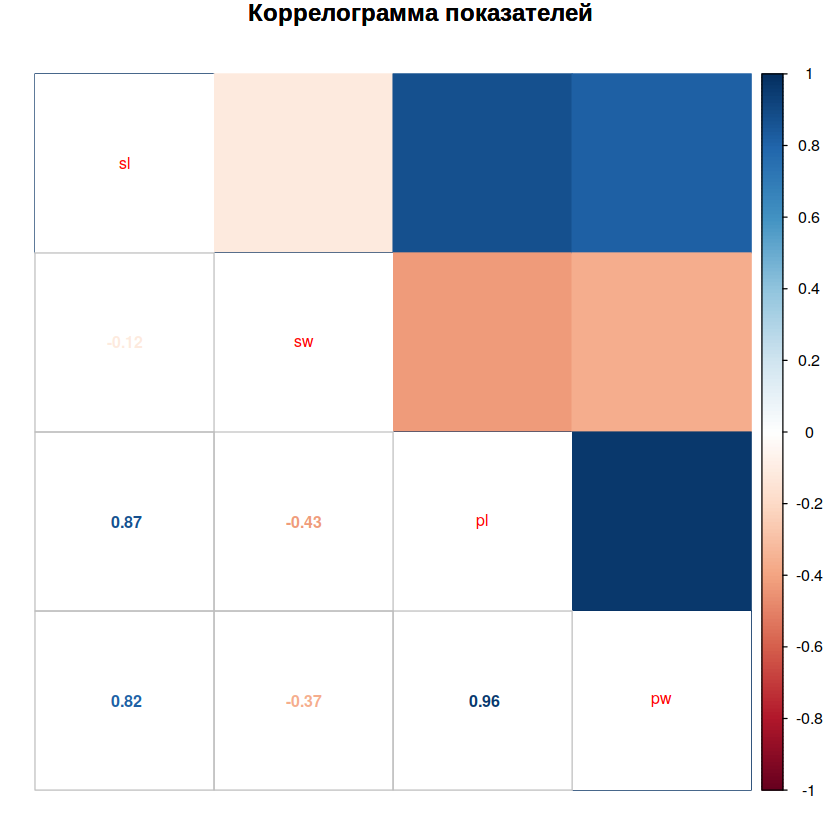

In [71]:
corrplot.mixed(C, lower = "number", upper="color", number.cex=0.8, tl.cex = .8, 
               sig.level = 0.05, insig = "blank", mar=c(0,0,1,0),
               title="Коррелограмма показателей")

## Использование ранговых коэффициентов Спирмена, Кендала.

Не всегда для оценки корреляции можно использовать коэффициент линейной корреляции Пирсона. Так может быть ситуация, когда один или оба признака не являются количественными и представлены в номинальных шкалах. Также наиболее корректное использование линейного коэффициента корреляции Пирсона связано с требованием нормального распределения исследуемых признаков, что также может быть выполнено далего не всегда.

Во всех таких случаях используют так называемые **ранговые коэффициенты корреляции**. Для их определения абстрагируются от количественных значений переменных и обращают внимания лишь на их взаимный порядок друг относительно друга - проводят ранжирование (сортировку).

**Ранжирование** – это процедура упорядочения изучаемых объектов, которая выполняется на основе рассматриваемого признака . **Ранг** – это порядковый номер значений признака, расположенных в порядке возрастания или убывания их величин. Если значения признака имеют одинаковую количественную оценку, то ранг всех этих значений принимается равным средней арифметической из соответствующих номеров мест, которые они определяют.
Данные ранги называются **связными**.

Среди непараметрических методов оценки тесноты связи наибольшее значение имеют **ранговые коэффициенты Спирмена** и **Кендалла**. Эти коэффициенты могут быть использованы для определения тесноты связи как между количественными, так и между качественными признаками (рейтинги, уровни образования, квалификации и т.п.).



### Ранговый коэффициент корреляции Спирмена

Данный коэффициент определяется по формуле:
    $$\rho_{xy}=1-\frac{6\cdot \sum_{i=1}^n d_i^2}{n(n^2-1)}$$
где $n$ - количество измерений, $d_i$ - разность рангов между переменными $x, y$.

Данная формула используется в случае отсутствия связанных рангов в обоих признаках. В противном случае в формулу нужно вводить поправочные коэффициенты.

При наличии связанных рангов по каждому признаку рассчитывают величину:
    $$T_x=\frac{1}{2}\cdot \sum_{t=1}^{m_x}((N^x_t)^3-N^x_t)$$
     $$T_y=\frac{1}{2}\cdot \sum_{t=1}^{m_y}((N^y_t)^3-N^y_t)$$
     
$m_x$ - число групп неразличимых рангов по переменной $x$, $m_y$ - число групп неразличимых рангов по переменной $y$, $N^x_t$ - число рангов, входящих в $t$-ю группу неразличимых рангов по переменной $x$, $N^y_t$ - число рангов, входящих в $t$-ю группу неразличимых рангов по переменной $y$

В этом случае ранговый коэффициент Спирмена определяется по формуле:
    $$\rho_{xy}=\frac{\frac{1}{6}(n^3-n)-\sum_{i=1}^{n}(x_i-y_i)^2-T_x-T_y}{\sqrt{\left(\frac{1}{6}(n^3-n)-2T_x\right)\cdot \left(\frac{1}{6}(n^3-n)-2T_y\right)}}$$
    
Для проверки значимости коэффициента корреляции Спирмена выдвигают гипотезу $H_0$, что $\rho_{xy}=0$, после чего находят критическое значение статистики:
$$T_{\text{кр}}=t(\alpha,n-2)\cdot \sqrt{\frac{1-\rho_{xy}^2}{n-2}}$$

Если $|\rho|<T_{\text{кр}}$, то нулевая гипотеза не отвергается. В противном случае нулевая гипотеза отвергается с вероятностью ошибки $\alpha$.    

### Ранговый коэффициент корреляции Кендалла

Этот кеоэффициент используется для измерения связи между качественными и количественными переменными, характеризующими однородные объекты и ранжированные по одному принципу. Данный коэффициент рассчитывается по формуле:
$$\tau=\frac{2S}{n(n-1)}$$

где $S=P-Q$

Расчет данного коэффициента выполняется в следующей последовательности:
1. Значения X ранжируются в порядке возрастания или убывания;
2. Значения Y располагаются в порядке, соответствующем значениям X ;
3. Для каждого ранга Y определяется число следующих за ним значений рангов, превышающих его величину. Суммируя таким образом числа, определяется величина P , как мера соответствия последовательностей рангов по X и Y и учитывается со знаком (+);
4. Для каждого ранга Y определяется число следующих за ним значений рангов, меньших его величины. Суммарная величина обозначается через Q и фиксируется со знаком (–);
5. Определяется сумма баллов по всем членам ряда.

Как правило, коэффициент Кендалла меньше коэффициента Спирмена. При достаточно большом объеме совокупности значения данных коэффициентов имеют следующую зависимость:
$$\tau=\frac{2}{3}\rho_{xy}$$